In [1]:
import requests
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold
import warnings
import re
warnings.filterwarnings('ignore')

In [15]:
movies_db = pd.read_csv("movies_db_2.csv", delimiter=",",engine='python') #Provient de 2_Preprocessing

In [16]:
movies_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093 entries, 0 to 7092
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7093 non-null   int64  
 1   title          7093 non-null   object 
 2   budget         7093 non-null   int64  
 3   revenue        7093 non-null   int64  
 4   runtime        7093 non-null   float64
 5   pop_actors     7093 non-null   float64
 6   vote_average   7093 non-null   float64
 7   vote_count     7093 non-null   int64  
 8   pop_directors  7093 non-null   float64
 9   pop_producer   7093 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 554.3+ KB


In [17]:
scaler = StandardScaler()
scaler.fit(movies_db.drop(["title"],axis=1))
kmeans_movies = scaler.transform(movies_db.drop(["title"],axis=1))
kmeans_movies = pd.DataFrame(kmeans_movies)
kmeans_movies.columns = movies_db.drop(["title"],axis=1).columns
kmeans_movies["title"] = movies_db["title"]
kmeans_movies

,id,budget,revenue,runtime,pop_actors,vote_average,vote_count,pop_directors,pop_producer,title
0,-0.624728,-0.610624,-0.457729,-0.198057,1.005341,-0.295833,0.132849,4.282936,-0.511480,Four Rooms
1,-0.624723,-0.189900,-0.411709,0.225528,-0.030528,0.207533,-0.498316,-0.428260,-0.603907,Judgment Night
2,-0.624697,-0.437385,4.045982,0.613814,0.613518,1.277184,5.078105,2.837507,-0.429939,Star Wars
3,-0.624692,1.616738,5.009271,-0.127460,1.019170,1.025501,4.844214,0.812348,-0.526156,Finding Nemo
4,-0.624687,0.651548,3.473570,1.355087,1.245193,1.465946,6.931601,-0.162960,-0.130208,Forrest Gump
...,...,...,...,...,...,...,...,...,...,...
7088,1.383565,-0.412637,-0.423888,0.507917,0.037829,0.710898,-0.411878,-0.511442,-0.115533,Marshall
7089,0.713926,-0.697244,-0.470912,0.578515,-1.405768,-0.232912,-0.573228,-0.622238,-0.662220,Thanks Maa
7090,-0.225489,-0.709611,-0.482591,-0.127460,-1.216405,-0.799198,-0.572889,-0.703895,-0.591078,Silk Shoes
7091,2.723784,-0.649610,-0.482592,-3.021955,-1.764970,-3.882311,-0.574245,-0.685598,-0.603907,Vazante


In [18]:
# movies_model_data.drop(["id","genres",'original_language', 'overview','production_companies', 'release_date','actors', 'director', 'producers','target2','year','vote_average','vote_count','revenue','ratio'],axis=1,inplace=True)
kmeans_movies=kmeans_movies[["title",'vote_average','vote_count','revenue']]

1 21278.99999999999
2 12864.008568505862
3 8287.524061301308
4 5965.626890247357
5 4830.495131984737
6 4064.6301573799974
7 3629.918784465326
8 3269.088834276065
9 2895.910522655976
10 2597.9517620081015


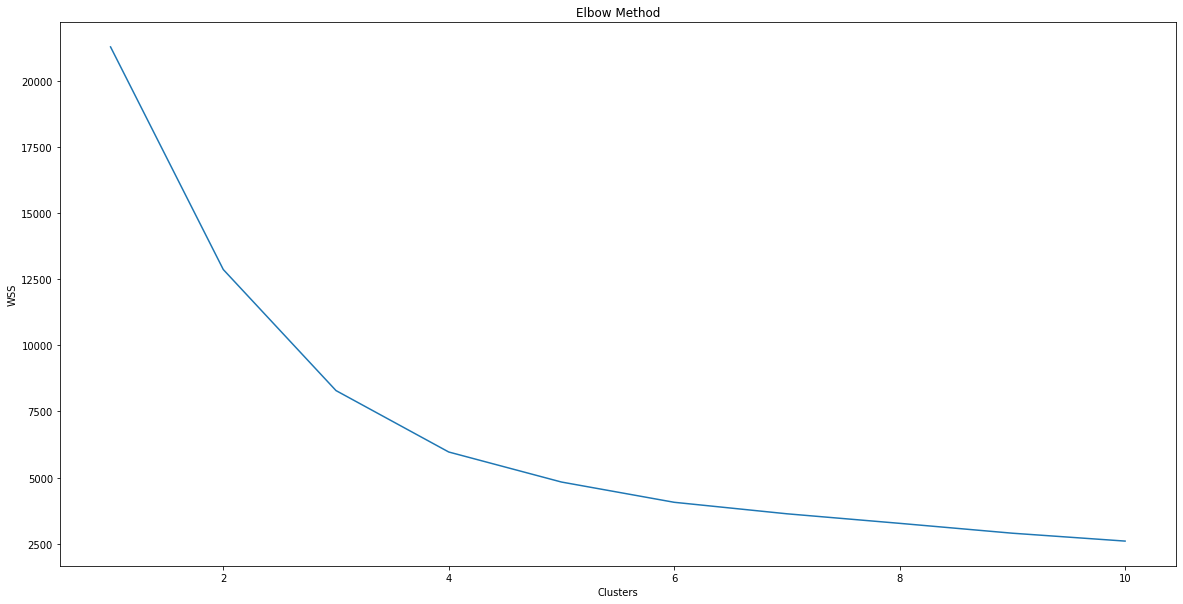

In [19]:
from sklearn.cluster import KMeans
df_kmean=kmeans_movies[["revenue","vote_average",'vote_count']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df_kmean)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
estimator = kmeans.fit(df_kmean)
estimator

KMeans(n_clusters=3, random_state=0)

In [21]:
class_predict = estimator.predict(df_kmean)
movies_db["target"] = class_predict

Export CSV

In [22]:
movies_db.to_csv("movies_db_3.csv",index=False)